# Voronoi plot of 2 objects with different color scales
### see PDBVoronoiColor.ipynb for a basic concept

### Import library and setup the objects

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

In [41]:
points_1 = np.random.uniform(size=[24, 2])
points_2 = np.random.uniform(size=[48, 2])
weight_1 = np.random.uniform(low=1.0, high=10.0, size=24)
weight_2 = np.random.uniform(low=1.0, high=5.0, size=48)

### Check if points and weight has the same length

In [3]:
len(points_1) == len(weight_1)

True

In [6]:
len(points_2) == len(weight_2)

True

### Set color scales

In [42]:
norm_1 = mpl.colors.Normalize(vmin = min(weight_1), vmax= max(weight_1), clip=True)
mapper_1 = cm.ScalarMappable(norm=norm_1, cmap=cm.Reds)
norm_2 = mpl.colors.Normalize(vmin = min(weight_2), vmax= max(weight_2), clip=True)
mapper_2 = cm.ScalarMappable(norm=norm_2, cmap=cm.YlGn)

In [43]:
Color = [mapper_1.to_rgba(x) for x in weight_1] + [mapper_2.to_rgba(x) for x in weight_2]

#### Note : Color is list element 

In [31]:
points_all = np.vstack([points_1,points_2])
print len(points_all) == len(points_1) + len(points_2)
points_all.shape

True


(72, 2)

In [30]:
len(Color) == len(points_all)

True

### Setup voronoi

In [24]:
vor = Voronoi(points_all)
len(vor.point_region)

72

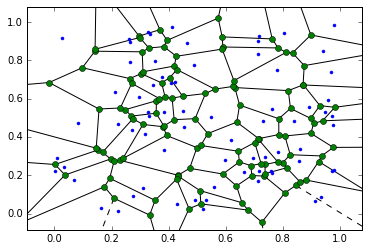

In [28]:
fig = voronoi_plot_2d(vor)

### Plot voronoi with colors

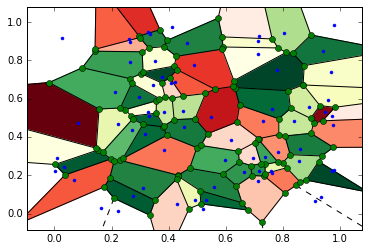

In [33]:
fig2 = voronoi_plot_2d(vor)
for r in range(len(points_all)): ## be NOT inclused PCB images
        region = vor.regions[vor.point_region[r]]
        if not -1 in region:
                polygon = [vor.vertices[i] for i in region]
                plt.fill(*zip(*polygon), color=Color[r])

### Add colorbars

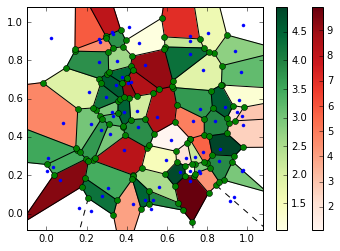

In [60]:
fig, ax = plt.subplots()
fig_vor = voronoi_plot_2d(vor, ax=ax)
for r in range(len(points_all)): 
        region = vor.regions[vor.point_region[r]]
        if not -1 in region:
                polygon = [vor.vertices[i] for i in region]
                plt.fill(*zip(*polygon), color=Color[r])
mapper_1.set_array([])
plt.colorbar(mapper_1)
mapper_2.set_array([])
plt.colorbar(mapper_2, fraction=0.07)

### Add colorbar(2)

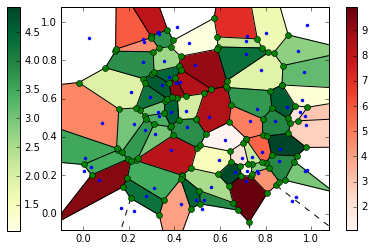

In [67]:
fig, ax = plt.subplots()
fig_vor = voronoi_plot_2d(vor, ax=ax)
for r in range(len(points_all)): 
        region = vor.regions[vor.point_region[r]]
        if not -1 in region:
                polygon = [vor.vertices[i] for i in region]
                plt.fill(*zip(*polygon), color=Color[r])
mapper_1.set_array([])
plt.colorbar(mapper_1)
mapper_2.set_array([])
cbaxes = fig.add_axes([0.0, 0.12, 0.03, 0.78])  # the position for the colorbar [left, bottom, width, height]
cb = plt.colorbar(mapper_2, ax=ax, cax = cbaxes)